# Lab8:

Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

#### 1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

In [1]:
using Roots
using Plots
using ForwardDiff
using Suppressor
using DataFrames

In [2]:
# falsi method
function intervalMethod(f, a, b)
    t = Roots.Tracks(Float64, Float64)
    find_zero(f, (a, b), FalsePosition(), verbose=true)
    return t
end


# Newton method
function derivativeMethod(f, startX)
    D(f) = x -> ForwardDiff.derivative(f, float(x))
    t = Roots.Tracks(Float64, Float64)
    find_zero((f, D(f)), startX, Roots.Newton(),verbose=true, tracks=t)
    return t
end


# secants method
function derivativeApproxMethod(f, startX)
    t = Roots.Tracks(Float64, Float64)
    find_zero(f, startX, verbose=true)
    return t
end

derivativeApproxMethod (generic function with 1 method)

In [3]:
# function testMethod(dataframe, method, f, startX, method_name, f_name)
#     io = open("log.txt", "w+")
#     out = @capture_out begin print(method(f, startX)) end
#     write(io, out)
#     close(io)
#     lines = readlines("log.txt")
#     iter = parse(Int64, lines[5][15:end])
#     eval = parse(Int64, lines[6][28:end])
#     x = lines[end - 1][8:end]
#     i = 1
#     while x[i] != ','
#         i += 1
#     end
#     zero = parse(Float64, x[1:(i-1)])
#     zero_val = f(zero)
#     push!(dataframe, [f_name method_name iter eval zero_val])
# end

In [4]:
f1(x) = sin(x) - x / 2
f2(x) = 2 * x - exp(-x)
f3(x) = x * exp(-x)
f4(x) = exp(x) - 1 / (10 * x) ^ 2
f5(x) = (x + 3) * (x - 1) ^ 2
f6(x) = x ^ 3

function test(f, a, b)
    intervalMethod(f, a, b)
    derivativeMethod(f, (a + b) / 2)
    derivativeApproxMethod(f, (a + b) / 2)
end

df = DataFrame(func = String[], method = String[], iterations = Int64[], evaluations = Int64[], zero_value = Bool[])

,func,method,iterations,evaluations,zero_value
,String,String,Int64,Int64,Bool


In [5]:
test(f1, 0, 10)

Results of univariate zero finding:

* Converged to: 1.895494267033981
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 10
* function evaluations ≈ 12
* stopped as f(x_n) = 0

Trace:
x₁ = 0,	 fx₁ = 0
x₂ = 10,	 fx₂ = -5.5440211108893696
x₃ = 5,	 fx₃ = -3.4589242746631386
x₄ = 2.5,	 fx₄ = -0.65152785589604356
x₅ = 1.25,	 fx₅ = 0.3239846193555862
x₆ = 1.6651466890159652,	 fx₆ = 0.16297896098014875
x₇ = 1.9446763851217526,	 fx₇ = -0.041420950418796343
x₈ = 1.8880306380481127,	 fx₈ = 0.0060864607812989302
x₉ = 1.8952878661159387,	 fx₉ = 0.00016902681276442788
x₁₀ = 1.8954942966408586,	 fx₁₀ = -2.4248700047913019e-08
x₁₁ = 1.8954942670304449,	 fx₁₁ = 2.8961277820371834e-12
x₁₂ = 1.8954942670339809,	 fx₁₂ = 0



Results of univariate zero finding:

* Converged to: 1.895494267033981
* Algorithm: Roots.Newton()
* iterations: 6
* function evaluations ≈ 12
* stopped as f(x_n) = 0

Trace:
x₁ = 5,	 fx₁ = -3.4589242746631386
x₂ = -10.988532943579219,	 fx₂ = 6.4942416816294779
x₃ = 1.8195792624869025,	 fx₃ = 0.059423179322815045
x₄ = 1.899211029513324,	 fx₄ = -0.003050655692591997
x₅ = 1.8955022189114259,	 fx₅ = -6.5127967007194698e-06
x₆ = 1.8954942670705659,	 fx₆ = -2.9963920233910812e-11
x₇ = 1.8954942670339809,	 fx₇ = 0



Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 2
* function evaluations ≈ 4
* stopped as f(x_n) = 0
* Note: Used bracketing method AlefeldPotraShi() on  [-10.988747528500655,5.0]

Trace:
x₁ = 5.0000060556377948,	 fx₁ = -3.4589255847090024
x₂ = 5,	 fx₂ = -3.4589242746631386
x₃ = -10.988747528500655,	 fx₃ = 6.4943504620211705
(a₃, b₃) = ( -10.988747528500655, 5 )
(a₄, b₄) = ( 0, 5 )



Algorithm has not been run

In [6]:
push!(df, ["sin(x) - x / 2" "interval" 10 12 iszero(f1(1.895494267033981))])
push!(df, ["sin(x) - x / 2" "derivative" 6 12 iszero(f1(1.895494267033981))])
push!(df, ["sin(x) - x / 2" "derivativeApprox" 2 4 iszero(f1(0.0))])

,func,method,iterations,evaluations,zero_value
,String,String,Int64,Int64,Bool
1,sin(x) - x / 2,interval,10,12,1
2,sin(x) - x / 2,derivative,6,12,1
3,sin(x) - x / 2,derivativeApprox,2,4,1


In [7]:
test(f2, -0.1, 3)

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 6
* function evaluations ≈ 8
* stopped as f(x_n) = 0

Trace:
x₁ = 0,	 fx₁ = -1
x₂ = 3,	 fx₂ = 5.9502129316321364
x₃ = 0.43164145178146418,	 fx₃ = 0.21384071227717771
x₄ = 0.35327968187736314,	 fx₄ = 0.0041786410100026483
x₅ = 0.35172477734461571,	 fx₅ = -2.4152548061651125e-05
x₆ = 0.35173371304558215,	 fx₆ = 4.8564718913013394e-09
x₇ = 0.35173371124919794,	 fx₇ = 5.773159728050814e-15
x₈ = 0.35173371124919584,	 fx₈ = 0



Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 1.45,	 fx₁ = 2.665429711906202
x₂ = 0.25718466270311424,	 fx₂ = -0.25885608927960191
x₃ = 0.35052582707756769,	 fx₃ = -0.0032659888887462962
x₄ = 0.35173352133535846,	 fx₄ = -5.1342588514025067e-07
x₅ = 0.35173371124919117,	 fx₅ = -1.2545520178264269e-14
x₆ = 0.35173371124919584,	 fx₆ = 0



Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 4
* function evaluations ≈ 9
* stopped as f(x_n) = 0
* Note: Used bracketing method AlefeldPotraShi() on  [0.25718428360732837,1.45]

Trace:
x₁ = 1.4500060555076217,	 fx₁ = 2.6654432433593125
x₂ = 1.45,	 fx₂ = 2.665429711906202
x₃ = 0.25718428360732837,	 fx₃ = -0.25885714059772547
(a₃, b₃) = ( 0.25718428360732837, 1.45 )
(a₄, b₄) = ( 0.25718428360732837, 0.6196842836073283 )
(a₅, b₅) = ( 0.35173278625731053, 0.35173466003497172 )
(a₆, b₆) = ( 0.35173278625731053, 0.35173371124919584 )



Algorithm has not been run

In [8]:
push!(df, ["2 * x - exp(-x)" "interval" 6 8 iszero(f2(0.35173371124919584))])
push!(df, ["2 * x - exp(-x)" "derivative" 5 1 iszero(f2(0.35173371124919584))])
push!(df, ["2 * x - exp(-x)" "derivativeApprox" 4 9 iszero(f2(0.35173371124919584))])

,func,method,iterations,evaluations,zero_value
,String,String,Int64,Int64,Bool
1,sin(x) - x / 2,interval,10,12,1
2,sin(x) - x / 2,derivative,6,12,1
3,sin(x) - x / 2,derivativeApprox,2,4,1
4,2 * x - exp(-x),interval,6,8,1
5,2 * x - exp(-x),derivative,5,1,1
6,2 * x - exp(-x),derivativeApprox,4,9,1


In [9]:
test(f3, -0.1, 3)

Results of univariate zero finding:

* Converged to: 2.7284841053187847e-12
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 40
* function evaluations ≈ 42

Trace:
x₁ = 0,	 fx₁ = 0
x₂ = 3,	 fx₂ = 0.14936120510359183
x₃ = 1.5,	 fx₃ = 0.33469524022264474
x₄ = 0.75,	 fx₄ = 0.35427491455576099
x₅ = 0.375,	 fx₅ = 0.25773347954661457
x₆ = 0.1875,	 fx₆ = 0.15544295965882507
x₇ = 0.09375,	 fx₇ = 0.085360346379378199
x₈ = 0.046875,	 fx₈ = 0.044728437467305704
x₉ = 0.0234375,	 fx₉ = 0.02289457089726708
x₁₀ = 0.01171875,	 fx₁₀ = 0.011582222427115372
x₁₁ = 0.005859375,	 fx₁₁ = 0.0058251431112840112
x₁₂ = 0.0029296875,	 fx₁₂ = 0.0029211169917379102
x₁₃ = 0.00146484375,	 fx₁₃ = 0.0014626995536278255
x₁₄ = 0.000732421875,	 fx₁₄ = 0.00073188562959992421
x₁₅ = 0.0003662109375,	 fx₁₅ = 0.00036607685160261499
x₁₆ = 0.00018310546875,	 fx₁₆ = 0.00018307194420667111
x₁₇ = 9.1552734375e-05,	 fx₁₇ = 9.1544352855509829e-05
x₁₈ = 4.57763671875e-05,	 fx₁₈ = 4.5774271759668018e-05
x₁₉ = 2.288818359375e

Results of univariate zero finding:

* Converged to: 34.79256836061439
* Algorithm: Roots.Newton()
* iterations: 29
* function evaluations ≈ 58
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 1.45,	 fx₁ = 0.34012691773600656
x₂ = 4.6722222222222225,	 fx₂ = 0.043692124385243405
x₃ = 5.9445368969574721,	 fx₃ = 0.015575372972062103
x₄ = 7.1467803063686404,	 fx₄ = 0.0056273403348987448
x₅ = 8.309467103383966,	 fx₅ = 0.0020455846790544577
x₆ = 9.4462759823153792,	 fx₆ = 0.00074609666051108996
x₇ = 10.564671355861517,	 fx₇ = 0.00027269521578226395
x₈ = 11.669222778779689,	 fx₈ = 9.9807429389972473e-05
x₉ = 12.762950318332891,	 fx₉ = 3.6565556094586889e-05
x₁₀ = 13.847963004175954,	 fx₁₀ = 1.3405776552778735e-05
x₁₁ = 14.925796354075466,	 fx₁₁ = 4.9175243294895016e-06
x₁₂ = 15.997605532852329,	 fx₁₂ = 1.80460924206137e-06
x₁₃ = 17.064282843294286,	 fx₁₃ = 6.624668707023485e-07
x₁₄ = 18.126532743259006,	 fx₁₄ = 2.4325489787149943e-07
x₁₅ = 19.184921677843189,	 fx₁₅ 

Results of univariate zero finding:

* Converged to: 31.341791410696633
* Algorithm: Secant()
* iterations: 39
* function evaluations ≈ 43

Trace:
x₁ = 1.4500060555076217,	 fx₁ = 0.34012627853466587
x₂ = 1.45,	 fx₂ = 0.34012691773600656
x₃ = 1.4506055507621782,	 fx₃ = 0.34006297419780562
x₄ = 1.5111606269800058,	 fx₄ = 0.33344323291671391
x₅ = 4.5613826109214148,	 fx₅ = 0.047655519127317109
x₆ = 5.0700115865022255,	 fx₆ = 0.031851573854667269
x₇ = 6.0951121611272594,	 fx₇ = 0.013737513229807253
x₈ = 6.8725376648526701,	 fx₈ = 0.0071188844564845418
x₉ = 7.7087233045206114,	 fx₉ = 0.0034604012784272865
x₁₀ = 8.4996351976965201,	 fx₁₀ = 0.0017300379175748646
x₁₁ = 9.2903983377465842,	 fx₁₁ = 0.0008575621463104867
x₁₂ = 10.067644603991686,	 fx₁₂ = 0.00042717455818358242
x₁₃ = 10.839088389877983,	 fx₁₃ = 0.00021263584690955938
x₁₄ = 11.603689807407386,	 fx₁₄ = 0.0001059687124457269
x₁₅ = 12.363284861282592,	 fx₁₅ = 5.2823537579962396e-05
x₁₆ = 13.118282807479552,	 fx₁₆ = 2.6343844486145806e

Algorithm has not been run

In [10]:
push!(df, ["x * exp(-x)" "interval" 40 42 iszero(f3(2.7284841053187847e-12))])
push!(df, ["x * exp(-x)" "derivative" 29 58 iszero(f3(34.79256836061439))])
push!(df, ["x * exp(-x)" "derivativeApprox" 39 43 iszero(f3(31.341791410696633))])

,func,method,iterations,evaluations,zero_value
,String,String,Int64,Int64,Bool
1,sin(x) - x / 2,interval,10,12,1
2,sin(x) - x / 2,derivative,6,12,1
3,sin(x) - x / 2,derivativeApprox,2,4,1
4,2 * x - exp(-x),interval,6,8,1
5,2 * x - exp(-x),derivative,5,1,1
6,2 * x - exp(-x),derivativeApprox,4,9,1
7,x * exp(-x),interval,40,42,0
8,x * exp(-x),derivative,29,58,0
9,x * exp(-x),derivativeApprox,39,43,0


In [11]:
test(f4, -0.1, 3)

Results of univariate zero finding:

* Converged to: 0.09534461720025875
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 10
* function evaluations ≈ 12
* stopped as f(x_n) = 0

Trace:
x₁ = 0,	 fx₁ = -Inf
x₂ = 3,	 fx₂ = 20.084425812076557
x₃ = 1.5,	 fx₃ = 4.4772446258936203
x₄ = 0.75,	 fx₄ = 2.0992222388348969
x₅ = 0.375,	 fx₅ = 1.3838803035070901
x₆ = 0.1875,	 fx₆ = 0.92178580497653617
x₇ = 0.09375,	 fx₇ = -0.039492637469952019
x₈ = 0.097601573695323046,	 fx₈ = 0.052772271718954267
x₉ = 0.09539860947651034,	 fx₉ = 0.0013042087236161404
x₁₀ = 0.095344614346001763,	 fx₁₀ = -6.9001735436557965e-08
x₁₁ = 0.095344617202569537,	 fx₁₁ = 5.5863313974668927e-11
x₁₂ = 0.095344617200258747,	 fx₁₂ = 0



Results of univariate zero finding:

* Converged to: -8.999510577046975
* Algorithm: Roots.Newton()
* iterations: 15
* function evaluations ≈ 30
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 1.45,	 fx₁ = 4.2583582726004456
x₂ = 0.45265045408460269,	 fx₂ = 1.5236683413631751
x₃ = -0.39945571970072391,	 fx₃ = 0.60801455195517051
x₄ = -2.1030269847408563,	 fx₄ = 0.11982526421454857
x₅ = -3.1021034212118881,	 fx₅ = 0.043915372489547751
x₆ = -4.093766587404513,	 fx₆ = 0.016079605376222272
x₇ = -5.0751406464580437,	 fx₇ = 0.0058619641283489416
x₈ = -6.0365582114945839,	 fx₈ = 0.0021153464114492941
x₉ = -6.9567343877058256,	 fx₉ = 0.0007455730298835567
x₁₀ = -7.7918321618732067,	 fx₁₀ = 0.00024838500861563712
x₁₁ = -8.4616627702322891,	 fx₁₁ = 7.1754917167090855e-05
x₁₂ = -8.8638563273265714,	 fx₁₂ = 1.4130329273074981e-05
x₁₃ = -8.9892472763235158,	 fx₁₃ = 9.9163671682652517e-07
x₁₄ = -8.999448193500454,	 fx₁₄ = 5.9909705773500323e-09
x₁₅ = -8.9995105747305377,	

Results of univariate zero finding:

* Converged to: -0.1054119671030927
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 10
* function evaluations ≈ 19
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Used bracketing method AlefeldPotraShi() on  [-0.12566503725349248,-0.0601004196495252]

Trace:
x₁ = 1.4500060555076217,	 fx₁ = 4.2583841277269547
x₂ = 1.45,	 fx₂ = 4.2583582726004456
x₃ = 1.4493944492378217,	 fx₃ = 4.2557735467176316
x₄ = 1.3888393730199942,	 fx₄ = 4.0050086431143113
x₅ = 0.4217040197391061,	 fx₅ = 1.4683250911139574
x₆ = -0.13810924691997906,	 fx₆ = 0.34673416146652281
x₇ = -0.0601004196495252,	 fx₇ = -1.8268329862689709
x₈ = -0.12566503725349248,	 fx₈ = 0.24866622213046985
(a₈, b₈) = ( -0.12566503725349248, -0.0601004196495252 )
(a₉, b₉) = ( -0.12566503725349248, -0.091516678962898321 )
(a₁₀, b₁₀) = ( -0.10573290860416007, -0.10521560749665863 )
(a₁₁, b₁₁) = ( -0.1054119671054241, -0.10541196710077502 )
(a₁₂, b₁₂) =

Algorithm has not been run

In [12]:
push!(df, ["exp(x) - 1 / (10 * x) ^ 2" "interval" 10 12 iszero(f4(0.09534461720025875))])
push!(df, ["exp(x) - 1 / (10 * x) ^ 2" "derivative" 15 30 iszero(f4(-8.999510577046975))])
push!(df, ["exp(x) - 1 / (10 * x) ^ 2" "derivativeApprox" 10 19 iszero(f4(-0.1054119671030927))])

,func,method,iterations,evaluations,zero_value
,String,String,Int64,Int64,Bool
1,sin(x) - x / 2,interval,10,12,1
2,sin(x) - x / 2,derivative,6,12,1
3,sin(x) - x / 2,derivativeApprox,2,4,1
4,2 * x - exp(-x),interval,6,8,1
5,2 * x - exp(-x),derivative,5,1,1
6,2 * x - exp(-x),derivativeApprox,4,9,1
7,x * exp(-x),interval,40,42,0
8,x * exp(-x),derivative,29,58,0
9,x * exp(-x),derivativeApprox,39,43,0


In [13]:
test(f5, -5, 3)

Results of univariate zero finding:

* Converged to: -3.0
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 11
* function evaluations ≈ 13
* stopped as f(x_n) = 0

Trace:
x₁ = -5,	 fx₁ = -72
x₂ = 0,	 fx₂ = 3
x₃ = -0.20000000000000001,	 fx₃ = 4.032
x₄ = -0.68345323741007191,	 fx₄ = 6.5651278159709161
x₅ = -1.837067475948414,	 fx₅ = 9.3603879061063484
x₆ = -3.4495756373972446,	 fx₆ = -8.9010236710403134
x₇ = -2.6636028086174672,	 fx₇ = 4.5151182382007846
x₈ = -2.9281170242512058,	 fx₈ = 1.1091617453559861
x₉ = -3.0020448415419576,	 fx₉ = -0.032750924237028724
x₁₀ = -2.9999245354909165,	 fx₁₀ = 0.0012073865866281867
x₁₁ = -2.999999922900463,	 fx₁₁ = 1.2335925440770963e-06
x₁₂ = -3.0000000000000022,	 fx₁₂ = -3.5527136788005041e-14
x₁₃ = -3,	 fx₁₃ = 0



Results of univariate zero finding:

* Converged to: 1.0
* Algorithm: Roots.Newton()
* iterations: 1
* function evaluations ≈ 2
* stopped as f(x_n) = 0

Trace:
x₁ = -1,	 fx₁ = 8
x₂ = 1,	 fx₂ = 0



Results of univariate zero finding:

* Converged to: 0.9999999903057905
* Algorithm: Secant()
* iterations: 36
* function evaluations ≈ 40
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -0.99999394450887913,	 fx₁ = 7.9999757779621783
x₂ = -1,	 fx₂ = 8
x₃ = -0.9993944508879129,	 fx₃ = 7.9975770703942457
x₄ = -0.93883953967920286,	 fx₄ = 7.7481057318379953
x₅ = 0.9418809364381604,	 fx₅ = 0.013314986139419735
x₆ = 0.94511848582959701,	 fx₆ = 0.01188262033469443
x₇ = 0.97197654827869329,	 fx₇ = 0.00311924818084563
x₈ = 0.98153644839072807,	 fx₈ = 0.0013573166768156661
x₉ = 0.9889009865813887,	 fx₉ = 0.00049138512910372239
x₁₀ = 0.99308009815108389,	 fx₁₀ = 0.00019120880660663657
x₁₁ = 0.99574214334262345,	 fx₁₁ = 7.2440181113936475e-05
x₁₂ = 0.99736579634869837,	 fx₁₂ = 2.7737836690920217e-05
x₁₃ = 0.99837327420039779,	 fx₁₃ = 1.0580642606647353e-05
x₁₄ = 0.99899457410704839,	 fx₁₄ = 4.0425085387105981e-06
x₁₅ = 0.99937872196202315,	 fx₁₅ = 1.5437057970158699e-

Algorithm has not been run

In [14]:
push!(df, ["(x + 3) * (x - 1) ^ 2" "interval" 11 13 iszero(f5(-3.0))])
push!(df, ["(x + 3) * (x - 1) ^ 2" "derivative" 1 2 iszero(f5(1.0))])
push!(df, ["(x + 3) * (x - 1) ^ 2" "derivativeApprox" 36 40 iszero(f5(0.9999999903057905))])

,func,method,iterations,evaluations,zero_value
,String,String,Int64,Int64,Bool
1,sin(x) - x / 2,interval,10,12,1
2,sin(x) - x / 2,derivative,6,12,1
3,sin(x) - x / 2,derivativeApprox,2,4,1
4,2 * x - exp(-x),interval,6,8,1
5,2 * x - exp(-x),derivative,5,1,1
6,2 * x - exp(-x),derivativeApprox,4,9,1
7,x * exp(-x),interval,40,42,0
8,x * exp(-x),derivative,29,58,0
9,x * exp(-x),derivativeApprox,39,43,0


In [15]:
test(f6, -0.1, 3)

Results of univariate zero finding:

* Converged to: 5.7220458984375e-6
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 19
* function evaluations ≈ 21
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = 0
x₂ = 3,	 fx₂ = 27
x₃ = 1.5,	 fx₃ = 3.375
x₄ = 0.75,	 fx₄ = 0.421875
x₅ = 0.375,	 fx₅ = 0.052734375
x₆ = 0.1875,	 fx₆ = 0.006591796875
x₇ = 0.09375,	 fx₇ = 0.000823974609375
x₈ = 0.046875,	 fx₈ = 0.000102996826171875
x₉ = 0.0234375,	 fx₉ = 1.2874603271484375e-05
x₁₀ = 0.01171875,	 fx₁₀ = 1.6093254089355469e-06
x₁₁ = 0.005859375,	 fx₁₁ = 2.0116567611694336e-07
x₁₂ = 0.0029296875,	 fx₁₂ = 2.514570951461792e-08
x₁₃ = 0.00146484375,	 fx₁₃ = 3.14321368932724e-09
x₁₄ = 0.000732421875,	 fx₁₄ = 3.92901711165905e-10
x₁₅ = 0.0003662109375,	 fx₁₅ = 4.9112713895738125e-11
x₁₆ = 0.00018310546875,	 fx₁₆ = 6.1390892369672656e-12
x₁₇ = 9.1552734375e-05,	 fx₁₇ = 7.673861546209082e-13
x₁₈ = 4.57763671875e-05,	 fx₁₈ = 9.5923269327613525e-14
x₁₉ = 2.2888183593

Results of univariate zero finding:

* Converged to: 7.561887823727517e-6
* Algorithm: Roots.Newton()
* iterations: 30
* function evaluations ≈ 60
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 1.45,	 fx₁ = 3.0486249999999999
x₂ = 0.96666666666666656,	 fx₂ = 0.90329629629629593
x₃ = 0.64444444444444438,	 fx₃ = 0.26764334705075438
x₄ = 0.42962962962962958,	 fx₄ = 0.079301732459482785
x₅ = 0.28641975308641976,	 fx₅ = 0.023496809617624535
x₆ = 0.19094650205761315,	 fx₆ = 0.0069620176644813424
x₇ = 0.12729766803840875,	 fx₇ = 0.0020628200487352115
x₈ = 0.084865112025605843,	 fx₈ = 0.00061120594036598883
x₉ = 0.056576741350403893,	 fx₉ = 0.00018109805640473739
x₁₀ = 0.037717827566935931,	 fx₁₀ = 5.3658683379181463e-05
x₁₁ = 0.025145218377957287,	 fx₁₁ = 1.5898869149387098e-05
x₁₂ = 0.016763478918638192,	 fx₁₂ = 4.7107760442628451e-06
x₁₃ = 0.011175652612425462,	 fx₁₃ = 1.3957854945963988e-06
x₁₄ = 0.0074504350749503082,	 fx₁₄ = 4.1356607247300703e-07
x₁₅ = 0.004

Results of univariate zero finding:

* Converged to: 3.898782395042023e-5
* Algorithm: Secant()
* iterations: 39
* function evaluations ≈ 43

Trace:
x₁ = 1.4500060555076217,	 fx₁ = 3.0486631952738352
x₂ = 1.45,	 fx₂ = 3.0486249999999999
x₃ = 1.4493944492378217,	 fx₃ = 3.0448070834545162
x₄ = 1.3888393730199942,	 fx₄ = 2.6788972734916583
x₅ = 0.94550381830369923,	 fx₅ = 0.84525911176609236
x₆ = 0.74113775251393832,	 fx₆ = 0.40709597505003486
x₇ = 0.55126189156551697,	 fx₇ = 0.16752279601613848
x₈ = 0.41849020464162057,	 fx₈ = 0.073291885002144688
x₉ = 0.31522167943207596,	 fx₉ = 0.031321909874810157
x₁₀ = 0.23815307432319938,	 fx₁₀ = 0.013507300959745089
x₁₁ = 0.17971851374898304,	 fx₁₁ = 0.0058046823007328625
x₁₂ = 0.13568231326547711,	 fx₁₂ = 0.0024978693437557116
x₁₃ = 0.10241866133404737,	 fx₁₃ = 0.0010743289657977838
x₁₄ = 0.077314979463488906,	 fx₁₄ = 0.00046215848895325831
x₁₅ = 0.05836293894650206,	 fx₁₅ = 0.00019879774775024149
x₁₆ = 0.044056998915964402,	 fx₁₆ = 8.551547874079

Algorithm has not been run

In [16]:
push!(df, ["x^3" "interval" 19 21 iszero(f6(5.7220458984375e-6))])
push!(df, ["x^3" "derivative" 30 60 iszero(f6(7.561887823727517e-6))])
push!(df, ["x^3" "derivativeApprox" 39 43 iszero(f6(3.898782395042023e-5))])

,func,method,iterations,evaluations,zero_value
,String,String,Int64,Int64,Bool
1,sin(x) - x / 2,interval,10,12,1
2,sin(x) - x / 2,derivative,6,12,1
3,sin(x) - x / 2,derivativeApprox,2,4,1
4,2 * x - exp(-x),interval,6,8,1
5,2 * x - exp(-x),derivative,5,1,1
6,2 * x - exp(-x),derivativeApprox,4,9,1
7,x * exp(-x),interval,40,42,0
8,x * exp(-x),derivative,29,58,0
9,x * exp(-x),derivativeApprox,39,43,0


#### 2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (1 pkt)

$$f(x) = e^x -2 - \frac{1}{(10x)^2} + \frac{2}{(100x)^3}$$

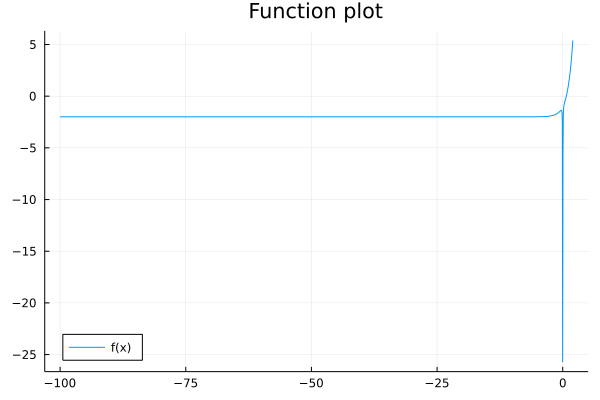

In [17]:
f(x) = exp(x) -2 -1 / (10*x)^2 + 2 / (100*x)^3
D(f) = x -> ForwardDiff.derivative(f, float(x))

plot(f, -100, 2, label="f(x)", legend=:bottomleft, title="Function plot")

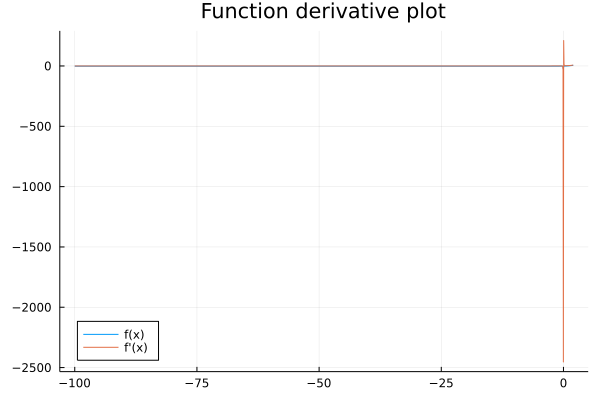

In [18]:
plot!(D(f), -100, 2, label="f'(x)", legend=:bottomleft, title="Function derivative plot")

### metoda falsi

In [19]:
intervalMethod(f, -100, 2)

Results of univariate zero finding:

* Converged to: 0.7032048403631358
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 7
* function evaluations ≈ 9
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = NaN
x₂ = 2,	 fx₂ = 5.3865563489306503
x₃ = 1,	 fx₃ = 0.70828382845904503
x₄ = 0.5,	 fx₄ = -0.39126272929987177
x₅ = 0.67792003737310536,	 fx₅ = -0.051976380253083806
x₆ = 0.70304958843804088,	 fx₆ = -0.00032254673380420669
x₇ = 0.70320642430343672,	 fx₇ = 3.2909672150031964e-06
x₈ = 0.70320484025809904,	 fx₈ = -2.1823585653897419e-10
x₉ = 0.7032048403631358,	 fx₉ = 1.7390094626899139e-16



Algorithm has not been run

In [20]:
iszero(f(0.7032048403631358))

false

### metoda Newtona

In [21]:
derivativeMethod(f, -2)

Results of univariate zero finding:

* Converged to: 0.7032048403631358
* Algorithm: Roots.Newton()
* iterations: 17
* function evaluations ≈ 34
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -2,	 fx₁ = -1.8671649667633872
x₂ = 12.056282279636104,	 fx₂ = 172175.68574840715
x₃ = 11.056293896009034,	 fx₃ = 63339.366551484411
x₄ = 10.05632547247647,	 fx₄ = 23300.722267245321
x₅ = 9.0564113044455024,	 fx₅ = 8571.3281939739372
x₆ = 8.0566446034357408,	 fx₆ = 3152.6869752500625
x₇ = 7.0572786416758193,	 fx₇ = 1159.2804003614101
x₈ = 6.0590011001195618,	 fx₈ = 425.94747394693667
x₉ = 5.0636754134945026,	 fx₉ = 156.17040236972571
x₁₀ = 4.0763234001448048,	 fx₁₀ = 56.927813095536692
x₁₁ = 3.1102779366029183,	 fx₁₁ = 20.426243245348601
x₁₂ = 2.1995281378672287,	 fx₁₂ = 7.0186891275544747
x₁₃ = 1.4216302193257353,	 fx₁₃ = 2.1389230844680029
x₁₄ = 0.90633010909741363,	 fx₁₄ = 0.46305090758737866
x₁₅ = 0.7212635114925281,	 fx₁₅ = 0.037813383807990028
x₁₆ = 0.70334511795

Results of univariate zero finding:

* Converged to: 0.7032048403631358
* Algorithm: Roots.Newton()
* iterations: 17
* function evaluations ≈ 34
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -2,	 fx₁ = -1.8671649667633872
x₂ = 12.056282279636104,	 fx₂ = 172175.68574840715
x₃ = 11.056293896009034,	 fx₃ = 63339.366551484411
x₄ = 10.05632547247647,	 fx₄ = 23300.722267245321
x₅ = 9.0564113044455024,	 fx₅ = 8571.3281939739372
x₆ = 8.0566446034357408,	 fx₆ = 3152.6869752500625
x₇ = 7.0572786416758193,	 fx₇ = 1159.2804003614101
x₈ = 6.0590011001195618,	 fx₈ = 425.94747394693667
x₉ = 5.0636754134945026,	 fx₉ = 156.17040236972571
x₁₀ = 4.0763234001448048,	 fx₁₀ = 56.927813095536692
x₁₁ = 3.1102779366029183,	 fx₁₁ = 20.426243245348601
x₁₂ = 2.1995281378672287,	 fx₁₂ = 7.0186891275544747
x₁₃ = 1.4216302193257353,	 fx₁₃ = 2.1389230844680029
x₁₄ = 0.90633010909741363,	 fx₁₄ = 0.46305090758737866
x₁₅ = 0.7212635114925281,	 fx₁₅ = 0.037813383807990028
x₁₆ = 0.70334511795

In [22]:
iszero(f(0.7032048403631358))

false

In [23]:
derivativeMethod(f, 0.01)

Results of univariate zero finding:

* Converged to: 0.7032048403631357
* Algorithm: Roots.Newton()
* iterations: 11
* function evaluations ≈ 22
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0.01,	 fx₁ = -98.989949832915812
x₂ = 0.015102309084782075,	 fx₂ = -44.248467667422744
x₃ = 0.022876133399301266,	 fx₃ = -19.918655631008562
x₄ = 0.034949865163729069,	 fx₄ = -9.1042861126420238
x₅ = 0.054508076811668665,	 fx₅ = -4.2973518599366658
x₆ = 0.089200292999004449,	 fx₆ = -2.160686113208873
x₇ = 0.16325246934381243,	 fx₇ = -1.1974216827717397
x₈ = 0.3709350046853207,	 fx₈ = -0.62355016047019196
x₉ = 0.7097036783745303,	 fx₉ = 0.013540324693123695
x₁₀ = 0.70322292948465492,	 fx₁₀ = 3.7584197802527644e-05
x₁₁ = 0.70320484050290732,	 fx₁₁ = 2.9040456015828783e-10
x₁₂ = 0.70320484036313569,	 fx₁₂ = -2.7365771053302484e-16



Results of univariate zero finding:

* Converged to: 0.7032048403631357
* Algorithm: Roots.Newton()
* iterations: 11
* function evaluations ≈ 22
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0.01,	 fx₁ = -98.989949832915812
x₂ = 0.015102309084782075,	 fx₂ = -44.248467667422744
x₃ = 0.022876133399301266,	 fx₃ = -19.918655631008562
x₄ = 0.034949865163729069,	 fx₄ = -9.1042861126420238
x₅ = 0.054508076811668665,	 fx₅ = -4.2973518599366658
x₆ = 0.089200292999004449,	 fx₆ = -2.160686113208873
x₇ = 0.16325246934381243,	 fx₇ = -1.1974216827717397
x₈ = 0.3709350046853207,	 fx₈ = -0.62355016047019196
x₉ = 0.7097036783745303,	 fx₉ = 0.013540324693123695
x₁₀ = 0.70322292948465492,	 fx₁₀ = 3.7584197802527644e-05
x₁₁ = 0.70320484050290732,	 fx₁₁ = 2.9040456015828783e-10
x₁₂ = 0.70320484036313569,	 fx₁₂ = -2.7365771053302484e-16



In [24]:
iszero(f(0.7032048403631357))

false

In [25]:
derivativeMethod(f, 0.000000001)

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Roots.Newton()

Trace:
x₁ = 1.0000000000000001e-09,	 fx₁ = 1.9999899999999995e+21
x₂ = 1.3333327777759259e-09,	 fx₂ = 8.4374542968720694e+20
x₃ = 1.7777760493766803e-09,	 fx₃ = 3.5595490539499972e+20
x₄ = 2.3703663099986788e-09,	 fx₄ = 1.5016836447656218e+20
x₅ = 3.1604852918422173e-09,	 fx₅ = 6.3352216192639828e+19
x₆ = 4.2139748398048947e-09,	 fx₆ = 2.6726681010040422e+19
x₇ = 5.6186232542768666e-09,	 fx₇ = 1.1275298753162193e+19
x₈ = 7.4914801337477496e-09,	 fx₈ = 4.7567555250920591e+18
x₉ = 9.9886089985102812e-09,	 fx₉ = 2.0067499728850952e+18
x₁₀ = 1.3318089900440491e-08,	 fx₁₀ = 8.4659412113356506e+17
x₁₁ = 1.7757354656480036e-08,	 fx₁₁ = 3.5715491276272352e+17
x₁₂ = 2.3676297685134562e-08,	 fx₁₂ = 1.506736138793689e+17
x₁₃ = 3.1568085462781598e-08,	 fx₁₃ = 63564803687881120
x₁₄ = 4.2090226923212067e-08,	 fx₁₄ = 26816048764837364
x₁₅ = 5.6119318211064785e-08,	 fx₁₅ = 11312822120773984
x₁₆ = 7.4824007633017958

LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

### metoda siecznych

In [26]:
derivativeApproxMethod(f, -5)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 2
* function evaluations ≈ 4
* Note: Used bracketing method AlefeldPotraShi() on  [-5.0,298.0822359033467]

Trace:
x₁ = -4.9999939443622052,	 fx₁ = -1.9936620291671865
x₂ = -5,	 fx₂ = -1.9936620690009146
x₃ = 298.08223590334671,	 fx₃ = 2.8541067075185228e+129
(a₃, b₃) = ( -5, 298.08223590334671 )
(a₄, b₄) = ( 0, 298.08223590334671 )



Algorithm has not been run

<h2 style="color:red"> 0 nie nalezy do dziedziny </h2>

In [27]:
derivativeApproxMethod(f, 0.0001)

Results of univariate zero finding:

* Converged to: 0.00019999920016961132
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 13
* function evaluations ≈ 18
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Used bracketing method AlefeldPotraShi() on  [0.00019999920015762444,0.0001999992002208157]

Trace:
x₁ = 0.0001060554544560602,	 fx₁ = 787538.8562873624
x₂ = 0.0001,	 fx₂ = 999999.00010000472
x₃ = 0.00012850157348359559,	 fx₃ = 336953.41233361757
x₄ = 0.00014298579993705417,	 fx₄ = 195030.29636042478
x₅ = 0.00016288997804362213,	 fx₅ = 85862.407169067359
x₆ = 0.00017854495367437817,	 fx₆ = 37694.25787968986
x₇ = 0.00019079584346839634,	 fx₇ = 13250.873282310902
x₈ = 0.00019743710820852966,	 fx₈ = 3328.9978379574022
x₉ = 0.00019966539217411688,	 fx₉ = 419.36632102692965
x₁₀ = 0.00019998655560784178,	 fx₁₀ = 15.809079754078994
x₁₁ = 0.00019999913696636687,	 fx₁₁ = 0.079006026149727404
x₁₂ = 0.00019999920015762444,	 fx₁₂ = 1.4983961591

Algorithm has not been run

In [28]:
iszero(f(0.00019999920016961132))

false

Rozbiliśmy bank, nic nie działa :)

#### 3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)(1 pkt)

### intervalMethod

In [29]:
f(x) = sin(x)
a, b = 0.05, 6.5
intervalMethod(f, a, b)

LoadError: ArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.



Natomiast pierwiastek w tym przedziale jest...

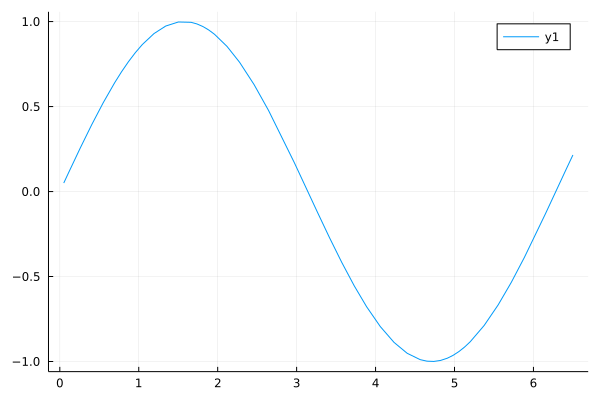

In [30]:
plot(f, a, b)

Metoda nie działa, ponieważ wartości na krańcach oraz w jego środku są tego samego znaku (algorytm opiera się na fakcie, że dla funkcji ciągłej w przedziale [a,b] o różnych znakach na jego końcu funkcja w tym przedziale ma pierwiastek).

### derivativeMethod

In [31]:
f(x) = x^3 - 2*x + 2
startX = 1
derivativeMethod(f, startX)

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Roots.Newton()

Trace:
x₁ = 1,	 fx₁ = 1
x₂ = 0,	 fx₂ = 2
x₃ = 1,	 fx₃ = 1
x₄ = 0,	 fx₄ = 2
x₅ = 1,	 fx₅ = 1
x₆ = 0,	 fx₆ = 2
x₇ = 1,	 fx₇ = 1
x₈ = 0,	 fx₈ = 2
x₉ = 1,	 fx₉ = 1
x₁₀ = 0,	 fx₁₀ = 2
x₁₁ = 1,	 fx₁₁ = 1
x₁₂ = 0,	 fx₁₂ = 2
x₁₃ = 1,	 fx₁₃ = 1
x₁₄ = 0,	 fx₁₄ = 2
x₁₅ = 1,	 fx₁₅ = 1
x₁₆ = 0,	 fx₁₆ = 2
x₁₇ = 1,	 fx₁₇ = 1
x₁₈ = 0,	 fx₁₈ = 2
x₁₉ = 1,	 fx₁₉ = 1
x₂₀ = 0,	 fx₂₀ = 2
x₂₁ = 1,	 fx₂₁ = 1
x₂₂ = 0,	 fx₂₂ = 2
x₂₃ = 1,	 fx₂₃ = 1
x₂₄ = 0,	 fx₂₄ = 2
x₂₅ = 1,	 fx₂₅ = 1
x₂₆ = 0,	 fx₂₆ = 2
x₂₇ = 1,	 fx₂₇ = 1
x₂₈ = 0,	 fx₂₈ = 2
x₂₉ = 1,	 fx₂₉ = 1
x₃₀ = 0,	 fx₃₀ = 2
x₃₁ = 1,	 fx₃₁ = 1
x₃₂ = 0,	 fx₃₂ = 2
x₃₃ = 1,	 fx₃₃ = 1
x₃₄ = 0,	 fx₃₄ = 2
x₃₅ = 1,	 fx₃₅ = 1
x₃₆ = 0,	 fx₃₆ = 2
x₃₇ = 1,	 fx₃₇ = 1
x₃₈ = 0,	 fx₃₈ = 2
x₃₉ = 1,	 fx₃₉ = 1
x₄₀ = 0,	 fx₄₀ = 2
x₄₁ = 1,	 fx₄₁ = 1
x₄₂ = 0,	 fx₄₂ = 2



LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

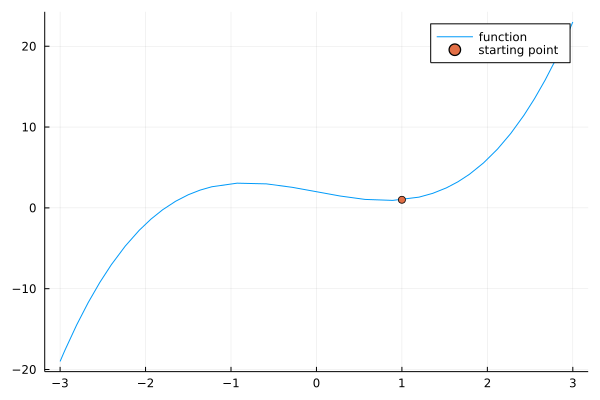

In [32]:
plot(f, -3, 3, label="function")
scatter!([startX], [f(startX)], label="starting point")

W metodzie Newtona przyjmuje się następujące założenia dla funkcji f:

- W przedziale [a,b] znajduje się dokładnie jeden pierwiastek.
- Funkcja ma różne znaki na krańcach przedziału, $${\displaystyle f(a)\cdot f(b)<0.}$$ 
- Pierwsza i druga pochodna funkcji mają stały znak w tym przedziale.

Jak widzimy po wykresie, funkcja nie jest monotoniczna, zatem trzecie założenie jest fałszywe (powoduje to, że algorytm wykonuje wahania na małym przedziale, starając się znaleźć minimum)

### derivativeApproxMethod

In [33]:
f(x) = (x^2 + 2x + 2)/(x^2 - 2x + 2) - 5
startX = -1.8
derivativeApproxMethod(f, startX)

Results of univariate zero finding:

* Converged to: -6.236647047591709e16
* Algorithm: Secant()
* iterations: 12
* function evaluations ≈ 16
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -1.7999939444795443,	 fx₁ = -4.8144800223586826
x₂ = -1.8,	 fx₂ = -4.8144796380090495
x₃ = -1.8006055520455739,	 fx₃ = -4.8144411838227317
x₄ = -1.8611607566029627,	 fx₄ = -4.8104123468578956
x₅ = -7.9166812123418344,	 fx₅ = -4.3933402644477217
x₆ = -71.704124588186062,	 fx₆ = -4.0542505164443723
x₇ = -834.36438421546359,	 fx₇ = -4.0047825907122032
x₈ = -62577.170155373184,	 fx₈ = -4.000063919032292
x₉ = -6236857.7472711457,	 fx₉ = -4.0000006413483966
x₁₀ = -623664915.45884836,	 fx₁₀ = -4.0000000064137007
x₁₁ = -62366470686.616562,	 fx₁₁ = -4.0000000000641371
x₁₂ = -6236647047802.3877,	 fx₁₂ = -4.0000000000006413
x₁₃ = -623664704759379.5,	 fx₁₃ = -4.0000000000000062
x₁₄ = -62366470475917088,	 fx₁₄ = -4



Algorithm has not been run

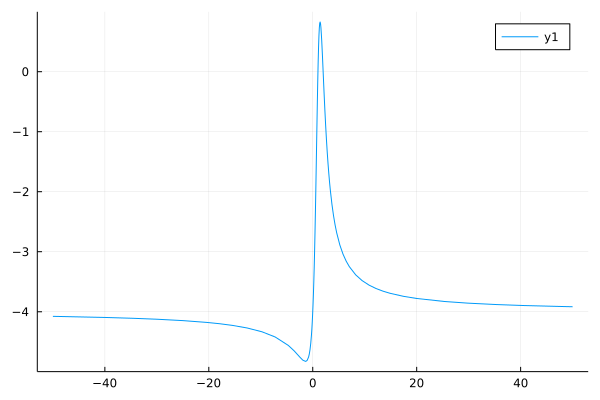

In [34]:
plot(f, -50, 50)

In [35]:
f(-6.236647047591709e16)

-4.0

$$x_0 = a$$
$$x_1 = b$$
$$x_{n+1} = \frac{f(x_n)x_{n-1} - f(x_{n-1})x_n}{f(x_n) - f(x_{n-1})}$$

Jak widać po stackTrace, różnica wartości funkcji $x_n$ i $x_{n+1}$ jest tak mała, że nowe $x_n$ jest źle obliczane.